# Pneumonia Diagnosis 



<img src="aa.png">

In [1]:
import skimage
from skimage.transform import resize

In [2]:
from keras.utils.np_utils import to_categorical
from keras.constraints import maxnorm
from keras.optimizers import Adam, RMSprop
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, Dense, Dropout
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import os
os.system("pip install opencv-python-headless")
os.system("pip install tqdm")

import pandas as pd 
import numpy as np   

import cv2                 
from random import shuffle
from tqdm import tqdm  

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

In [5]:
#use seeds for reproducible results
from numpy.random import seed
seed(302)
from tensorflow import set_random_seed
set_random_seed(202)

# Load data

In [6]:
#Note: One parameter that could improve performance is messing with the image size, e.g., 256x256, 128x128, etc.
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']: label = 0
            elif nextDir in ['PNEUMONIA']: label = 1
            else: label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (256, 256, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X, y

In [7]:
TRAIN_PATH = "../input/chest_xray/chest_xray/train/"
TEST_PATH =  "../input/chest_xray/chest_xray/test/"

In [8]:
X_train, y_train = get_data(TRAIN_PATH)

  0%|          | 0/1349 [00:00<?, ?it/s]/usr/local/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 3883/3883 [03:05<00:00, 20.88it/s]


In [9]:
X_test, y_test = get_data(TEST_PATH)

  0%|          | 0/234 [00:00<?, ?it/s]/usr/local/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 390/390 [00:14<00:00, 31.48it/s]


In [10]:
print(X_train.shape,'\n',X_test.shape)

(5232, 256, 256, 3) 
 (624, 256, 256, 3)


In [11]:
print(y_train.shape,'\n',y_test.shape)

(5232,) 
 (624,)


In [12]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [13]:
print(y_train.shape,'\n',y_test.shape)

(5232, 2) 
 (624, 2)


# Expore data

/usr/local/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(Left) = No Pneumonia AND  (Right) = Pneumonia
---------------------------------------------------------------------------------------------------------------


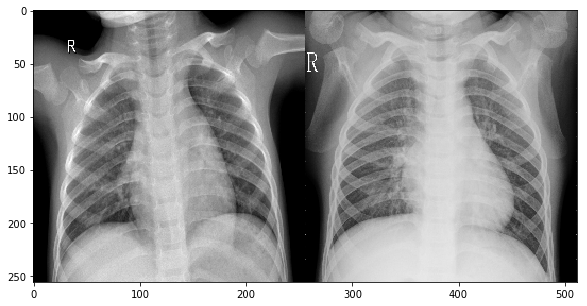

(Left) = No Pneumonia AND  (Right) = Pneumonia
---------------------------------------------------------------------------------------------------------------


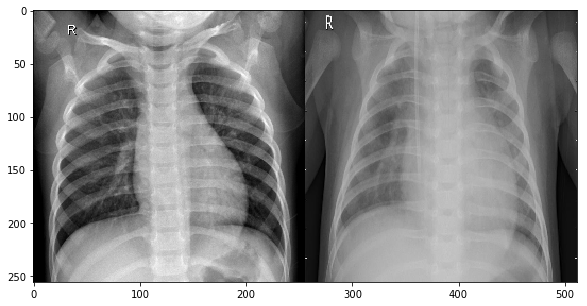

(Left) = No Pneumonia AND  (Right) = Pneumonia
---------------------------------------------------------------------------------------------------------------


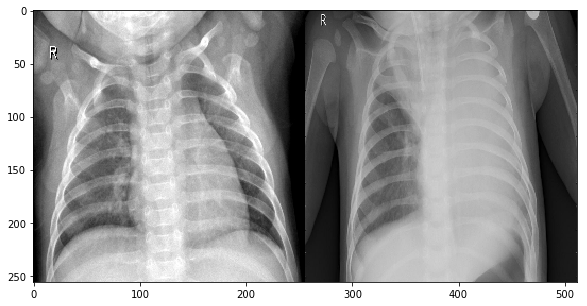

(Left) = No Pneumonia AND  (Right) = Pneumonia
---------------------------------------------------------------------------------------------------------------


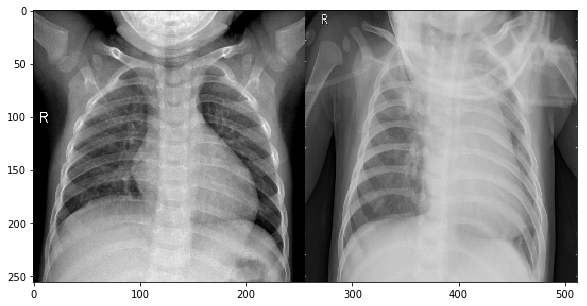

(Left) = No Pneumonia AND  (Right) = Pneumonia
---------------------------------------------------------------------------------------------------------------


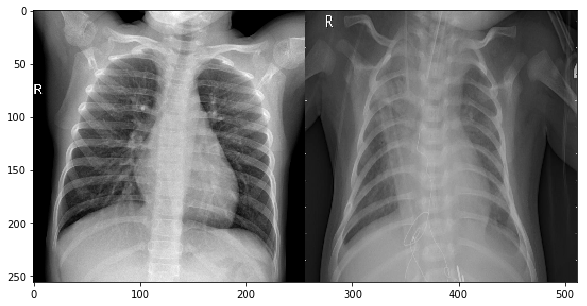

(Left) = No Pneumonia AND  (Right) = Pneumonia
---------------------------------------------------------------------------------------------------------------


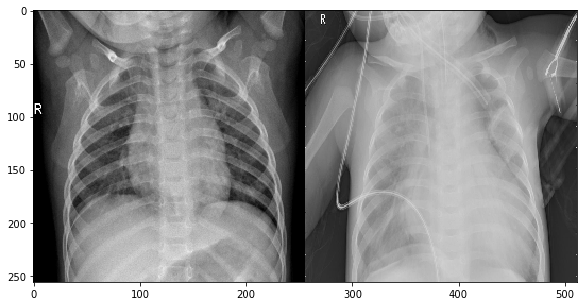

(Left) = No Pneumonia AND  (Right) = Pneumonia
---------------------------------------------------------------------------------------------------------------


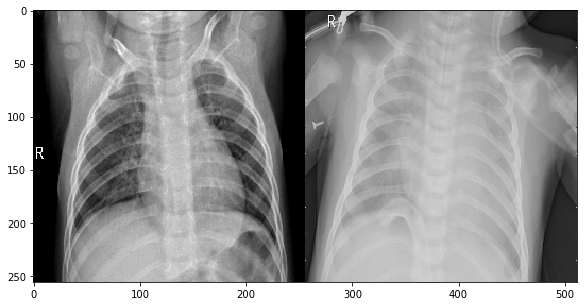

(Left) = No Pneumonia AND  (Right) = Pneumonia
---------------------------------------------------------------------------------------------------------------


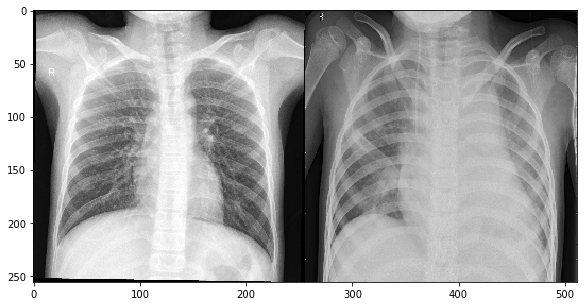

(Left) = No Pneumonia AND  (Right) = Pneumonia
---------------------------------------------------------------------------------------------------------------


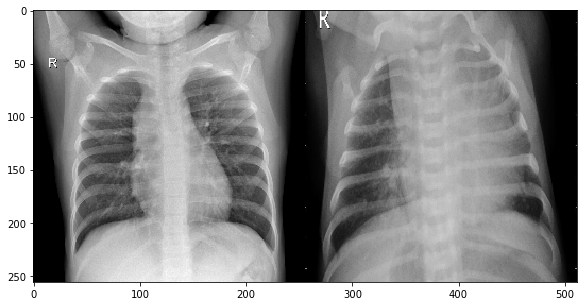

(Left) = No Pneumonia AND  (Right) = Pneumonia
---------------------------------------------------------------------------------------------------------------


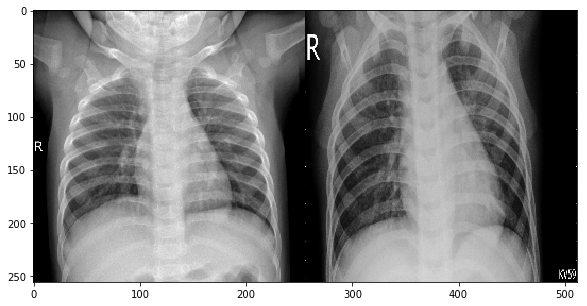

In [14]:
Pimages = os.listdir(TRAIN_PATH + "PNEUMONIA")
Nimages = os.listdir(TRAIN_PATH + "NORMAL")

def plotter(i):
    imagep1 = cv2.imread(TRAIN_PATH+"PNEUMONIA/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (256, 256, 3) , mode = 'reflect')
    
    imagen1 = cv2.imread(TRAIN_PATH+"NORMAL/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (256, 256, 3))
   
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) = No Pneumonia AND  (Right) = Pneumonia")
    print("---------------------------------------------------------------------------------------------------------------")
    
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()

for i in range(0,10):
    plotter(i)

In [15]:
y_train_df = pd.DataFrame(y_train, columns=['Healthy', 'Pneumonia'], index=None)
y_test_df = pd.DataFrame(y_test, columns=['Healthy', 'Pneumonia'], index=None)

In [16]:
def plot_labels(dataframe):
    # Get counts for each class
    cases_count = dataframe['Pneumonia'].value_counts()
    
    
    # Plot  results 
    plt.figure(figsize=(6,6))
    sns.barplot(x=cases_count.index, y=cases_count.values)
    plt.title('Number of Xrays, One Patient can have more than one', fontsize=14)
    plt.xlabel('Healthy or Not', fontsize=12)
    plt.ylabel('Xray Count', fontsize=12)
    plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])

    plt.show()
    print(cases_count)

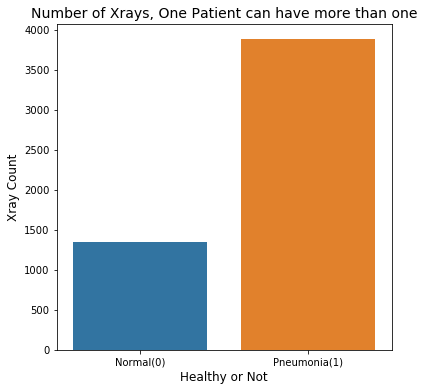

1.0    3883
0.0    1349
Name: Pneumonia, dtype: int64


In [17]:
plot_labels(y_train_df)

In [18]:
share = 3883 / (3883+1349)
print(share)

0.7421636085626911


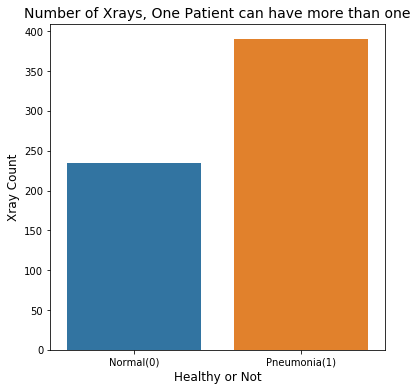

1.0    390
0.0    234
Name: Pneumonia, dtype: int64


In [19]:
plot_labels(y_test_df)

In [20]:
share = 390 / (390+234)
print(share)

0.625


# Notes: Compare to presenting population

These images are not representative of a presenting pneumonia population, because most have pneumonia. More specifically:

Train sample is 74% pneumonia

Test sample is 62% pneumonia

Presenting population is 18% pneumonia
    
18% determined from Malawian study (https://gh.bmj.com/content/bmjgh/3/2/e000506.full.pdf). We're focused on applying this to Sub-Saharan Africa.

We can adjust the class weights to properly trade off FP and FN (not necessarily to mimic population but to properly trade off FP and FN). For now, we will weight each equally below

We can adjust the confusion matrix and use class weighting to properly evaluate model performance

# Deep learning training

In [21]:
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [22]:
#Note: We will use these weights for Flask App
filepath="weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [23]:
X_train.shape

(5232, 256, 256, 3)

In [24]:
X_test.shape

(624, 256, 256, 3)

In [25]:
X_train=X_train.reshape(5232,3,256,256)

In [26]:
X_test=X_test.reshape(624,3,256,256)

In [27]:
model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu', padding="same", input_shape=(3,256,256)))
model.add(Conv2D(16, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00005), metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 256, 256)      1216      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 256, 256)      6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 128, 128)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 128, 128)      4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 128, 128)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 64, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        18496     
__________

In [28]:
# serialize model to JSON for Flask App
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [29]:
#Create validation sample
X_train80, X_valid20, y_train80, y_valid20  = train_test_split(X_train, y_train, test_size=0.2, random_state=22)

In [30]:
X_train80.shape

(4185, 3, 256, 256)

In [31]:
X_valid20.shape

(1047, 3, 256, 256)

In [32]:
#A weight of 13 would match the population. But we care more about FN then FP (hence a weight of 7 instead of 13 per below)
3883/(3883+1349*13)

0.18127917833800186

In [33]:
#We'll place ~2x emphasis on identifying pnemonia to get final weight
13/2

6.5

In [34]:
#Define class weighting (adjust to mimimize FN v FP) due to class imbalance (more pneumonia)
#We attach a higher weight to not pneumonia, because otherwise the model heavily labels xrays "pneumonia" to minimize log loss
class_weights = {0: 7,
                 1: 1}

In [35]:
batch_size = 64
epoch_num = 15

In [36]:
history = model.fit(X_train80, y_train80, validation_data = (X_valid20, y_valid20), callbacks=[lr_reduce, checkpoint],
          epochs=epoch_num, class_weight=class_weights)

Train on 4185 samples, validate on 1047 samples
Epoch 1/15
4185/4185 [==============================] - 666s - loss: 1.5882 - acc: 0.2749 - val_loss: 1.0975 - val_acc: 0.2493
Epoch 2/15
4185/4185 [==============================] - 666s - loss: 1.3666 - acc: 0.3330 - val_loss: 0.7825 - val_acc: 0.6289
Epoch 3/15
4185/4185 [==============================] - 665s - loss: 0.8615 - acc: 0.7741 - val_loss: 0.4392 - val_acc: 0.8252
Epoch 4/15
4185/4185 [==============================] - 666s - loss: 0.7220 - acc: 0.8122 - val_loss: 0.4854 - val_acc: 0.7813
Epoch 5/15
4160/4185 [============================>.] - ETA: 3s - loss: 0.6266 - acc: 0.8406
Epoch 00004: reducing learning rate to 4.999999873689376e-06.
Epoch 00004: val_acc did not improve
4185/4185 [==============================] - 666s - loss: 0.6253 - acc: 0.8409 - val_loss: 0.4385 - val_acc: 0.8123
Epoch 6/15
4185/4185 [==============================] - 666s - loss: 0.5851 - acc: 0.8510 - val_loss: 0.3106 - val_acc: 0.8596
Epoch 7/1

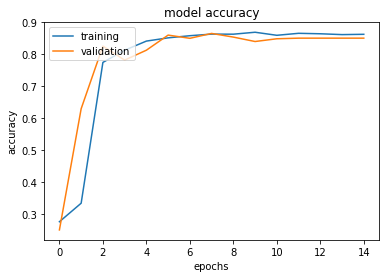

In [37]:
# summarize accuracy by epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.figure(figsize=(20,10))
plt.show()

# Evaluate test performance

In [38]:
 # Predict binary and probabilities
predictions = model.predict(X_test)

In [39]:
pred_df = pd.DataFrame(predictions)[1]
pred_df_binary = round(pred_df)

In [40]:
PLOT_FONT_SIZE = 10    #font size for axis of plots

#define helper function for confusion matrix

def displayConfusionMatrix(confusionMatrix):
    """Confusion matrix plot"""
    
    confusionMatrix = np.transpose(confusionMatrix)
    
    ## calculate class level precision and recall from confusion matrix
    precisionLow = round((confusionMatrix[0][0] / (confusionMatrix[0][0] + confusionMatrix[0][1]))*100, 1)
    precisionHigh = round((confusionMatrix[1][1] / (confusionMatrix[1][0] + confusionMatrix[1][1]))*100, 1)
    recallLow = round((confusionMatrix[0][0] / (confusionMatrix[0][0] + confusionMatrix[1][0]))*100, 1)
    recallHigh = round((confusionMatrix[1][1] / (confusionMatrix[0][1] + confusionMatrix[1][1]))*100, 1)

    ## show heatmap
    plt.imshow(confusionMatrix, interpolation='nearest',cmap=plt.cm.Blues,vmin=0, vmax=100)
    
    ## axis labeling
    xticks = np.array([0,1])
    plt.gca().set_xticks(xticks)
    plt.gca().set_yticks(xticks)
    plt.gca().set_xticklabels(["Not Pneumonia \n Recall=" + str(recallLow), "Pneumonia \n Recall=" + str(recallHigh)], fontsize=PLOT_FONT_SIZE)
    plt.gca().set_yticklabels(["Not Pneumonia \n Precision=" + str(precisionLow), "Pneumonia \n Precision=" + str(precisionHigh)], fontsize=PLOT_FONT_SIZE)
    plt.ylabel("Predicted Class", fontsize=PLOT_FONT_SIZE)
    plt.xlabel("Actual Class", fontsize=PLOT_FONT_SIZE)
        
    ## add text in heatmap boxes
    addText(xticks, xticks, confusionMatrix)
    
def addText(xticks, yticks, results):
    """Add text in the plot"""
    for i in range(len(yticks)):
        for j in range(len(xticks)):
            text = plt.text(j, i, results[i][j], ha="center", va="center", color="white", size=PLOT_FONT_SIZE) ### size here is the size of text inside a single box in the heatmap

In [41]:
#If we triple the test set negative samples (healthy), we get closer to the population (18% pneumonia, see above)
share = 390 / (390+234*7)
print(share)

0.19230769230769232


In [42]:
#For confusion matrix, make test data look like presenting population (add 6 copies)
healthy_pred = pred_df.loc[y_test_df['Pneumonia'] == 0]
healthy_pred_binary = pred_df_binary.loc[y_test_df['Pneumonia'] == 0]
healthy_act = y_test_df.loc[y_test_df['Pneumonia'] == 0]

In [43]:
pred_df_adj = pred_df
pred_df_binary_adj = pred_df_binary
y_test_df_adj = y_test_df
for i in range(1,6):
    pred_df_adj = pred_df_binary_adj.append(healthy_pred)
    pred_df_binary_adj = pred_df_binary_adj.append(healthy_pred_binary)
    y_test_df_adj = y_test_df_adj.append(healthy_act)

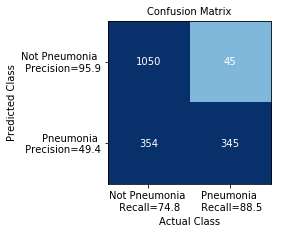

In [44]:
# We care about not pneumonia precision, because there is a huge cost to a false negative
# A false positive just leads to overprescribing of antibiotics, which could lead to drug resistance
confusionMatrix = None
confusionMatrix = confusion_matrix(y_test_df_adj.Pneumonia, pred_df_binary_adj)

plt.rcParams['figure.figsize'] = [3, 3] ## plot size
displayConfusionMatrix(confusionMatrix)
plt.title("Confusion Matrix", fontsize=PLOT_FONT_SIZE)
plt.show()

In [45]:
PLOT_FONT_SIZE = 10    #font size for axis of plots
global rocCurveData

## lists for ROC curves
rocCurveData = []
fpr, tpr, threshold = None, None, None

#define helper function for plotting ROC curves

def displaySingleROCCurve(MODEL_NAME, testLabels, predictionsConfidence):
    """ROC Curve plot"""
    predictionsConfidence = [item[1] for item in predictionsConfidence]
    fpr, tpr, threshold = roc_curve(testLabels, predictionsConfidence)
    
    ## plot roc curve
    plt.rcParams['figure.figsize'] = [8, 6]
    plt.plot(fpr,tpr, linewidth=3.0, color='#d60000')
    setLabelsAndTicks("False Positive Rate", "True Positive Rate", None, None, PLOT_FONT_SIZE, rotation=0)
    plt.title("ROC Curve for " + MODEL_NAME,fontsize=PLOT_FONT_SIZE)
    plt.tight_layout()
    plt.show()

def setLabelsAndTicks(xlabel, ylabel, xticks, yticks, fontsize, rotation=0):
    """Set axis and ticks labels in the plot"""
    if xticks == None:
        plt.xlabel(xlabel, fontsize=fontsize)
        plt.ylabel(ylabel,fontsize=fontsize)
        plt.xticks(fontsize=fontsize, rotation=rotation)
        plt.yticks(fontsize=fontsize)
    else:
        x = np.arange(len(xticks))
        plt.xlabel(xlabel, fontsize=fontsize)
        plt.ylabel(ylabel,fontsize=fontsize)
        plt.xticks(x, xticks, fontsize=fontsize, rotation=rotation)
        plt.yticks(x, yticks, fontsize=fontsize)

In [46]:
#generate ROC plot data
rocCurveData=[]

#ADA
MODEL_NAME = "CNN"
#predictionProb = [item[1] for item in pred_df_binary_adj] # we need to only use first column in 2D prob array
fpr, tpr, threshold = roc_curve(y_test_df_adj.Pneumonia, pred_df_adj)
rocCurveData.append([MODEL_NAME, fpr, tpr])

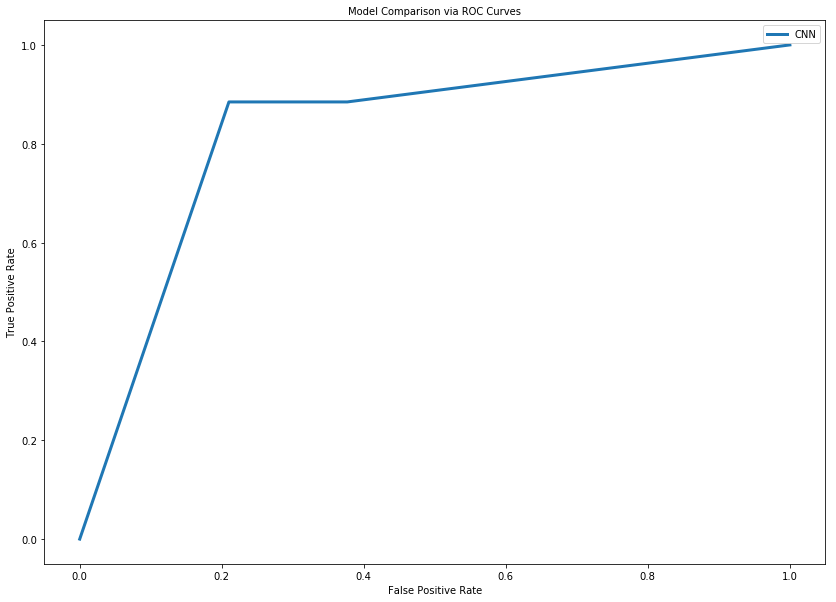

In [47]:
## Plot ROC curve.
plt.rcParams['figure.figsize'] = [14, 10]
classificationSettings = [item[0] for item in rocCurveData]
fprs = [item[1] for item in rocCurveData]
tprs = [item[2] for item in rocCurveData]

for c in range(0, len(classificationSettings)):
    plt.plot(fprs[c],tprs[c], linewidth=3.0)

plt.title("Model Comparison via ROC Curves",fontsize=PLOT_FONT_SIZE)
plt.legend(classificationSettings, fontsize=PLOT_FONT_SIZE)
plt.xticks(fontsize=PLOT_FONT_SIZE)
plt.yticks(fontsize=PLOT_FONT_SIZE)
plt.xlabel("False Positive Rate",fontsize=PLOT_FONT_SIZE)
plt.ylabel("True Positive Rate",fontsize=PLOT_FONT_SIZE)
plt.show()

In [48]:
roc_auc_score(y_test_df.Pneumonia, pred_df) * 100

91.491343414420328

In [49]:
roc_auc_score(y_test_df_adj.Pneumonia, pred_df_adj) * 100

82.763532763532766